In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [33]:
df = pd.read_csv('./insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df.shape

(1338, 7)

In [35]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [36]:
df.columns = (['age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges'])

In [37]:
df.head(5)

,age,sex,BMI,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
df.describe()

,age,BMI,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
df.dtypes

age           int64
sex          object
BMI         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [41]:
df.isnull().any()

age         False
sex         False
BMI         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### There are no missing values as such

In [42]:
df.duplicated().sum()

1

### There is one duplicate value

In [43]:
df.drop_duplicates(inplace = True)

In [44]:
df.duplicated().sum()

0

In [45]:
df.shape

(1337, 7)

In [46]:
df.describe()

,age,BMI,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

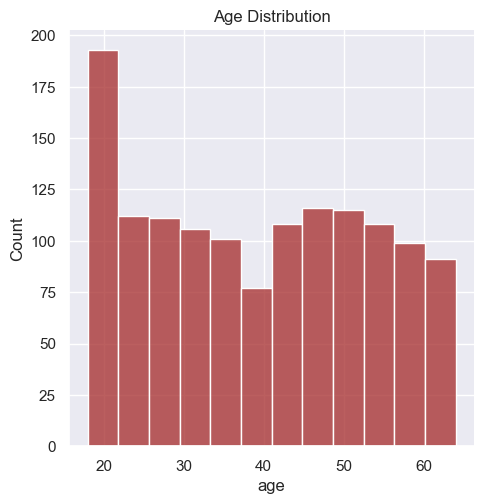

In [47]:
sns.set()
plt.figure(figsize = (6, 6))
sns.displot(df.age, color = 'brown')
plt.title('Age Distribution')
plt.show()

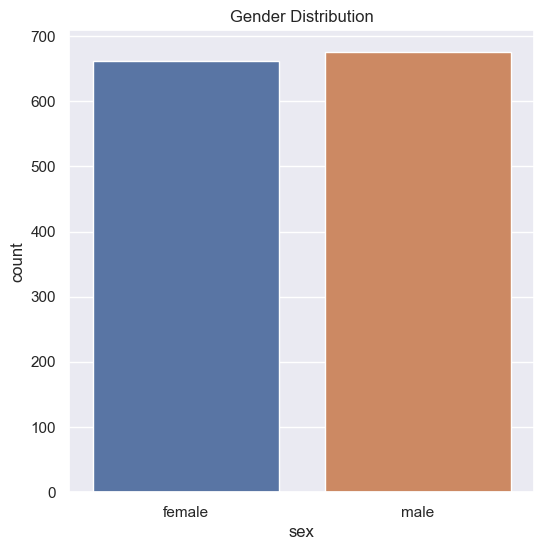

In [48]:
sns.set()
plt.figure(figsize = (6, 6))
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

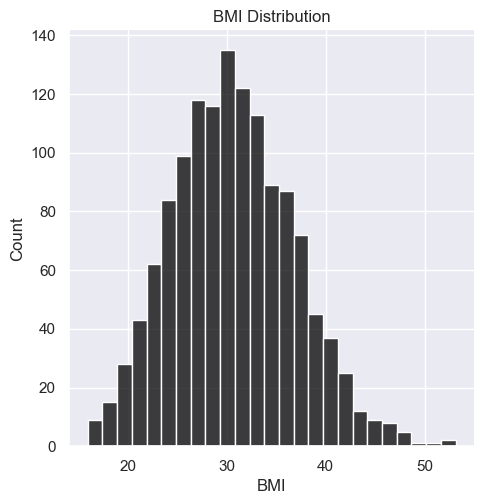

In [49]:
sns.set()
plt.figure(figsize = (6, 6))
sns.displot(df.BMI, color = 'black')
plt.title('BMI Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

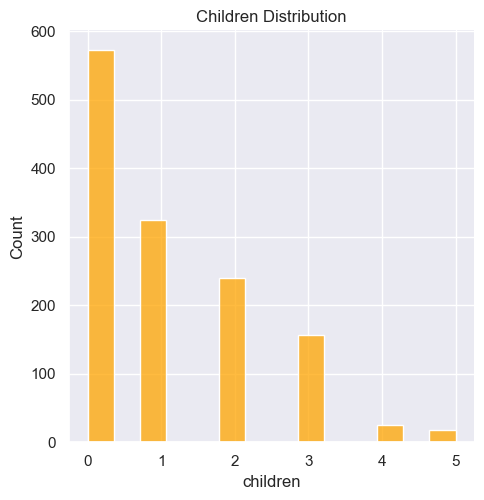

In [50]:
sns.set()
plt.figure(figsize = (6, 6))
sns.displot(df.children, color = 'orange')
plt.title('Children Distribution')
plt.show()

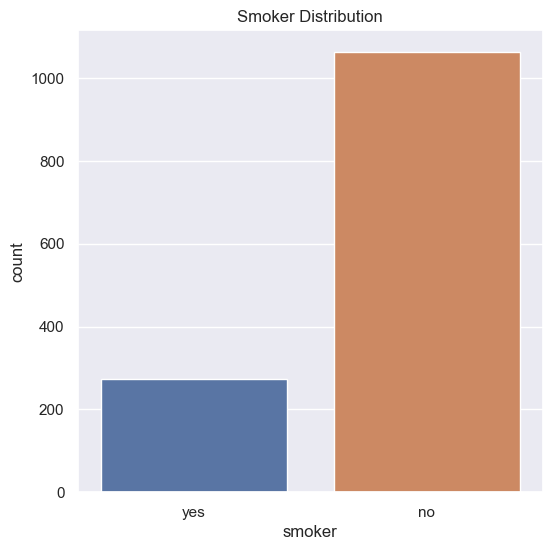

In [51]:
sns.set()
plt.figure(figsize = (6, 6))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Distribution')
plt.show()

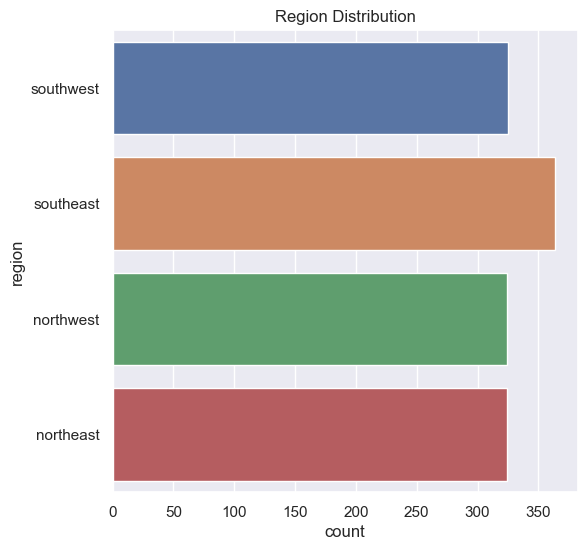

In [52]:
sns.set()
plt.figure(figsize = (6, 6))
sns.countplot(y = 'region', data = df)
plt.title('Region Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

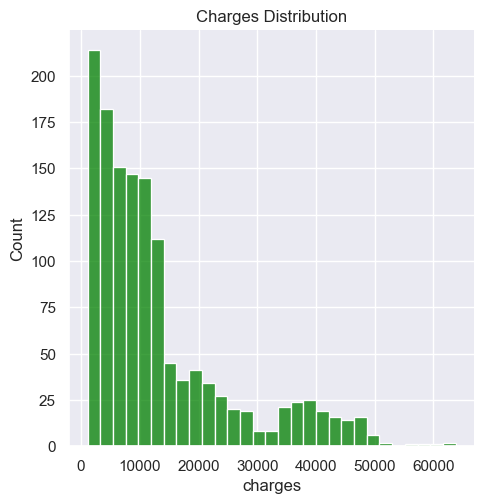

In [53]:
sns.set()
plt.figure(figsize = (6, 6))
sns.displot(df.charges, color = 'green')
plt.title('Charges Distribution')
plt.show()

## This dataset contain three categorical variables such sex, smoker, region

In [54]:
df.replace({'sex' : {'male' : 0, 'female' : 1}}, inplace = True)

In [55]:
df.replace({'smoker' : {'yes' : 1, 'no' : 0}}, inplace = True)

In [56]:
df.replace({'region' : {'southwest' : 0, 'southeast' : 1, 'northwest' : 2, 'northeast' : 3}}, inplace = True)

In [60]:
df.sample(5)

,age,sex,BMI,children,smoker,region,charges
1331,23,1,33.40,0,0,0,10795.93733
865,40,0,29.90,2,0,0,6600.36100
1250,24,0,29.83,0,1,3,18648.42170
219,24,1,23.21,0,0,1,25081.76784
470,27,0,32.67,0,0,1,2497.03830


## Spliting data in to features(age, sex, BMI, children, smoker, region) and targets(charges)

In [61]:
x = df.drop(columns = 'charges', axis = 1)
x.sample(5)

,age,sex,BMI,children,smoker,region
348,36,1,29.920,1,0,1
421,61,0,35.860,0,1,1
42,41,0,21.780,1,0,1
205,28,1,28.880,1,0,3
1238,37,0,22.705,3,0,3


In [62]:
y = df.charges
y.sample(5)

708      6113.23105
367      8017.06115
768     14319.03100
704      8930.93455
1174     4433.91590
Name: charges, dtype: float64

## Spliting data in to training data and testing data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 2)

## Train data

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(x_train, y_train)

LinearRegression()

## Model Evaluating

 traning_data_prediction 

In [65]:
traning_data_prediction = lr.predict(x_train) 

array([14038.54092734,  9204.38967571, 33951.1820513 , ...,
       17083.1445549 ,  9634.1358287 , 11998.36851191])

R square value

In [67]:
r2_train = metrics.r2_score(y_train, traning_data_prediction)
print("R square value : ", r2_train)

R square value :  0.7586223702914746


R square value for test data

In [68]:
test_data_prediction = lr.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
print("R square value for test data : ", r2_test)

R square value for test data :  0.7164204424900907


## Building a predictive system

In [76]:
input_data = (20, 1, 25, 74, 0, 1)
input_array = np.asarray(input_data).reshape(1, -1)
data_prediction = lr.predict(input_array) 
data_prediction

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49996.36820047])